# Data Cleaning

Clean the data by:

removing rows that have values which are missing,
changing the data type of some values within a column, and
removing columns which are not relevant to this task.
Think about how each column might be relevant to the business question you’re investigating. If you can’t think of why a column may be useful, it may not be worth including it.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
#import data
content = pd.read_csv('Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [290]:
reactions = pd.read_csv('Reactions.csv')
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [170]:
react_types = pd.read_csv('ReactionTypes.csv')
react_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [265]:
#Fix typos in category
content['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [266]:
content['Category'] = content['Category'].str.replace('"','')

In [267]:
content['Category'].value_counts()

Category
technology         72
animals            68
travel             67
culture            66
science            64
food               62
healthy eating     61
cooking            61
soccer             61
fitness            61
tennis             59
dogs               58
education          57
studying           56
veganism           49
public speaking    49
Fitness             5
Animals             4
Science             4
Soccer              3
Food                2
Studying            2
Education           2
Travel              2
Technology          1
Culture             1
Healthy Eating      1
Veganism            1
Public Speaking     1
Name: count, dtype: int64

In [268]:
content['Category'] = content['Category'].str.lower()

In [269]:
content['Category'].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

## Remove Null Rows

In [271]:
#find any Null values for reactions now
reactions.isna().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [250]:
#drop null values
reactions = reactions.dropna()

In [251]:
#check to see if they are gone
reactions.isna().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [252]:
#find any Null values for reaction types now
react_types.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [253]:
#reset index and drop new index column
reactions = reactions.reset_index().drop('index',axis=1)

## Adjusting Column Types

In [46]:
#view column types
content.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [272]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


All column types are accurate for content

In [45]:
reactions.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object

In [47]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


Need to change Datetime column to date time type

In [229]:
reactions['Datetime'] = pd.to_datetime(reactions['Datetime'])

In [55]:
#checking datetime column is a date type
reactions.dtypes

Unnamed: 0             int64
Content ID            object
User ID               object
Type                  object
Datetime      datetime64[ns]
dtype: object

In [60]:
react_types.dtypes

Unnamed: 0     int64
Type          object
Sentiment     object
Score          int64
dtype: object

In [61]:
react_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


Column types are accurate

## Removing useless columns

Aim: An analysis of their content categories that highlights the top 5 categories with the 
largest aggregate popularity 

In [65]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [274]:
#remove rows that dont help with data anlysis
content = content.drop(['User ID','URL'],axis=1)

In [275]:
#Rename type column as it is a different type to other files
content.rename(columns={'Type': 'Media Type'}, inplace=True)

In [254]:
content.head()

,Unnamed: 0,Content ID,User ID,Media Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food


In [276]:
reactions.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [291]:
reactions = reactions.drop('User ID', axis=1)

In [71]:
react_types.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [278]:
reactions.shape

(22534, 4)

In [279]:
content.shape

(1000, 4)

# Data Modelling

Now we want to figure out the top 5 categories. To complete your data modelling, follow these steps:

1. Create a final data set by merging your three tables together

We recommend using the Reaction table as your base table, then first join the relevant columns from your Content data set, and then the Reaction Types data set.
Hint: You can use a “VLookUp” formula
 
2. Figure out the Top 5 performing categories

Add up the total scores for each category.
Hint: You can use the “Sum If” formula

The end result should be one spreadsheet which contains:

A cleaned dataset
The top 5 categories

In [292]:
#merge content and reactions on Unnamed: 0	
cr =reactions.merge(content, how = 'left', on = 'Content ID').reset_index()
cr.head()

,index,Unnamed: 0_x,Content ID,Type,Datetime,Unnamed: 0_y,Media Type,Category
0,0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15,0,photo,studying
1,1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,0,photo,studying
2,2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,0,photo,studying
3,3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,0,photo,studying
4,4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,0,photo,studying


In [258]:
cr.shape

(22534, 10)

In [293]:
cr = cr.drop(['Unnamed: 0_x','Unnamed: 0_y','index'], axis=1)

In [294]:
cr.head()

,Content ID,Type,Datetime,Media Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying


In [295]:
crt = cr.merge(react_types, how ='left', on='Type')

In [296]:
crt.head()

,Content ID,Type,Datetime,Media Type,Category,Unnamed: 0,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15,photo,studying,NaN,NaN,NaN
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,2.0,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,11.0,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,14.0,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,2.0,negative,0.0


In [299]:
crt = crt.dropna()

In [286]:
crt.shape

(22534, 7)

In [287]:
crt.head()

,Content ID,Type,Datetime,Media Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [300]:
crt_final =crt.groupby('Category')['Score'].sum().reset_index().sort_values('Score',ascending= False).reset_index().drop('index',axis=1)

Top 5 categories are animals, science, healthy eating, technology and food

In [301]:
crt_answer = crt_final.head()
crt_answer

,Category,Score
0,animals,74965.0
1,science,71168.0
2,healthy eating,69339.0
3,technology,68738.0
4,food,66676.0


In [302]:
crt_answer.to_csv('crt_answer.csv', index = False)

In [305]:
crt.head()

,Content ID,Type,Datetime,Media Type,Category,Unnamed: 0,Sentiment,Score
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,2.0,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,11.0,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,14.0,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,2.0,negative,0.0
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,4.0,positive,30.0


In [326]:
crt['Datetime']=pd.to_datetime(crt['Datetime']).dt.to_period('M')

In [333]:
crt2 = crt.groupby('Datetime')['Score'].count().reset_index().sort_values('Score',ascending=False).reset_index()

In [334]:
crt2.head()

,index,Datetime,Score
0,11,2021-05,2138
1,7,2021-01,2126
2,2,2020-08,2114
3,6,2020-12,2092
4,1,2020-07,2070


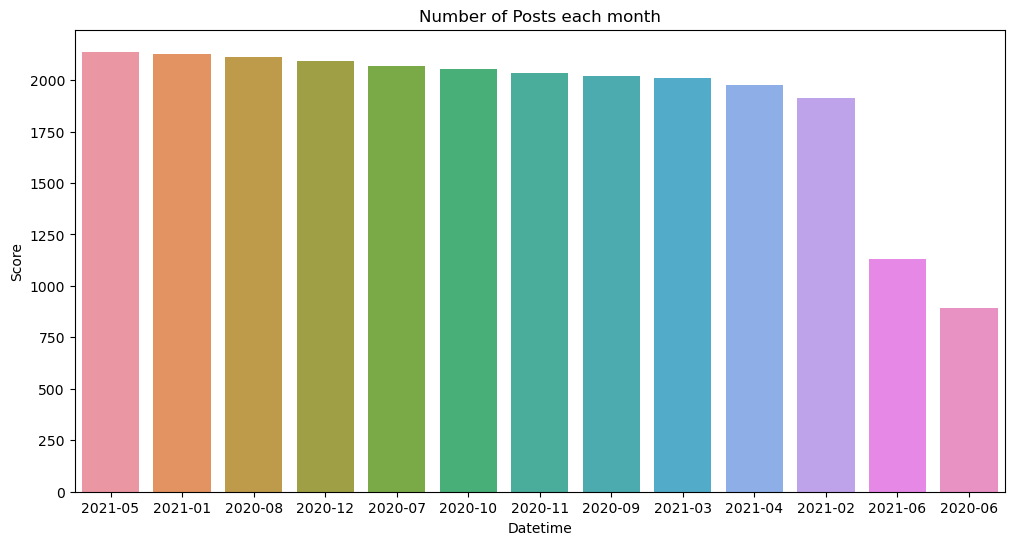

In [337]:
plt.figure(figsize=(12,6))
sns.barplot(x='Datetime',y='Score',data=crt2)
plt.title('Number of Posts each month')
plt.show()

In [353]:
crt3 = crt.groupby(['Datetime', 'Sentiment']).size().reset_index(name='Count')
crt3.head()

,Datetime,Sentiment,Count
0,2020-06,negative,291
1,2020-06,neutral,115
2,2020-06,positive,486
3,2020-07,negative,635
4,2020-07,neutral,267


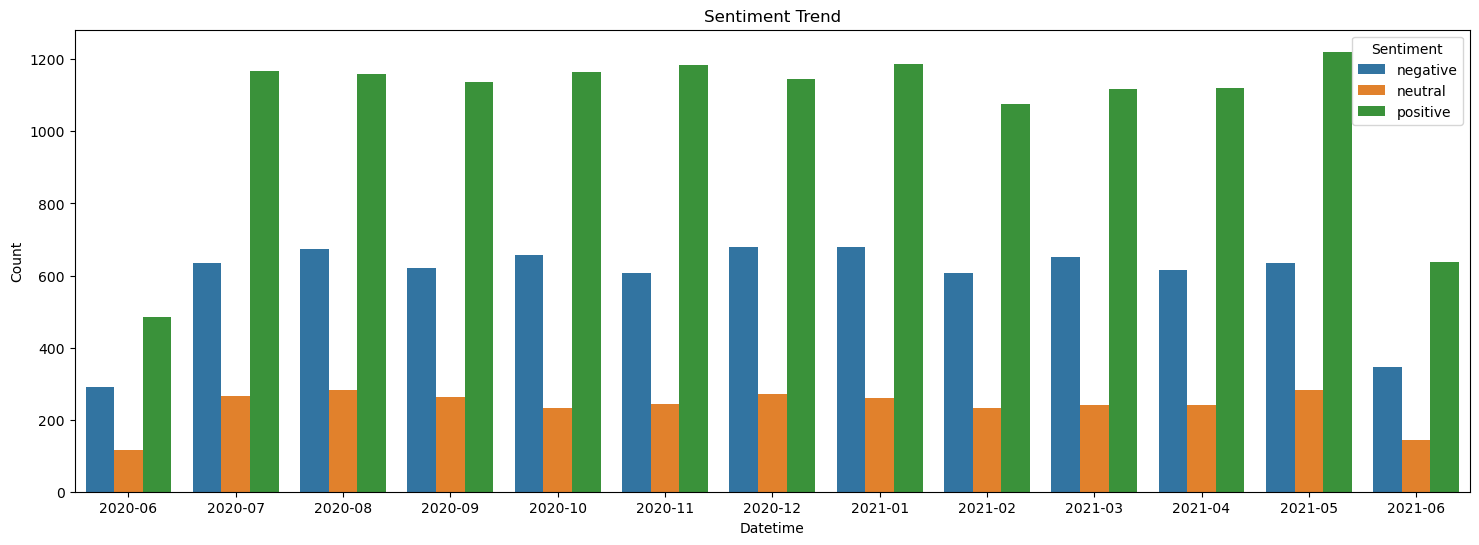

In [352]:
plt.figure(figsize=(18,6))
sns.barplot(x='Datetime',y='Count', hue='Sentiment',data=crt3)
plt.title('Sentiment Trend')
plt.show()

In [358]:
crt4 = crt.groupby(['Datetime', 'Type']).size().reset_index(name='Count').sort_values('Count', ascending=False).head(20)
crt4

,Datetime,Type,Count
181,2021-05,heart,158
156,2021-03,scared,158
98,2020-12,disgust,154
79,2020-10,worried,154
74,2020-10,love,153
105,2020-12,like,152
38,2020-08,indifferent,152
158,2021-03,want,150
53,2020-09,heart,150
107,2020-12,peeking,149


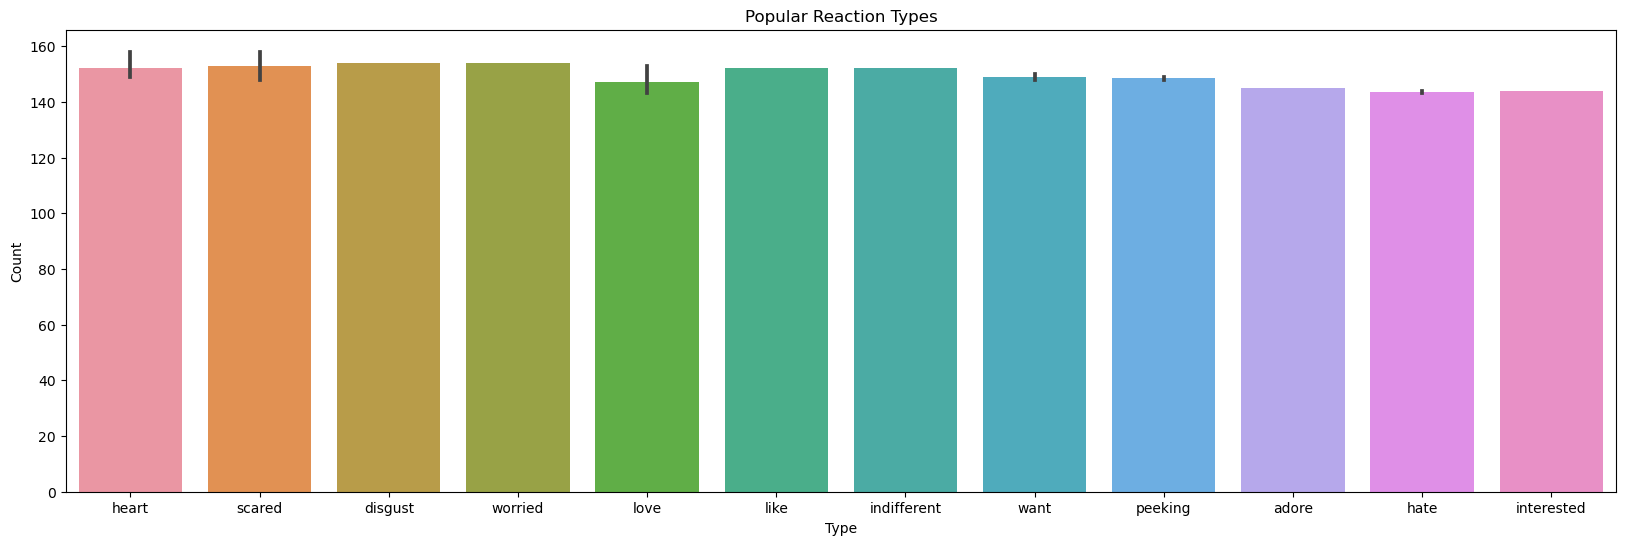

In [362]:
plt.figure(figsize=(20,6))
sns.barplot(x='Type', y='Count', data=crt4)
plt.title('Popular Reaction Types')
plt.show()

In [363]:
crt.head()

,Content ID,Type,Datetime,Media Type,Category,Unnamed: 0,Sentiment,Score
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11,photo,studying,2.0,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06,photo,studying,11.0,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04,photo,studying,14.0,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01,photo,studying,2.0,negative,0.0
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08,photo,studying,4.0,positive,30.0


In [367]:
crt5 = crt.Category.value_counts().reset_index()
crt5.head()

,Category,count
0,animals,1897
1,science,1796
2,healthy eating,1717
3,food,1699
4,technology,1698


In [369]:
crt.head()

,Content ID,Type,Datetime,Media Type,Category,Unnamed: 0,Sentiment,Score
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11,photo,studying,2.0,negative,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06,photo,studying,11.0,negative,10.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04,photo,studying,14.0,negative,15.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01,photo,studying,2.0,negative,0.0
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08,photo,studying,4.0,positive,30.0


In [370]:
crt = crt.drop('Unnamed: 0', axis=1)

In [371]:
crt.to_csv('crt.csv')